<a href="https://colab.research.google.com/github/NicoGangi5/Building_Deep_Learning_Models_with_TensorFlow/blob/main/RestrictedBoltzmannMachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
with urllib.request.urlopen("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week4/data/utils.py") as url:
    response = url.read()
target = open('utils.py', 'w')
target.write(response.decode('utf-8'))
target.close()

In [ ]:
import tensorflow as tf
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))

In [ ]:
import tensorflow as tf
import numpy as np

from PIL import Image
from utils import tile_raster_images
import matplotlib.pyplot as plt
%matplotlib inline

# RBM Layers

In [ ]:
v_bias = tf.Variable(tf.zeros([7]), tf.float32)
h_bias = tf.Variable(tf.zeros([2]), tf.float32)

In [ ]:
W = tf.constant(np.random.normal(loc=0.0, scale=1.0, size=(7, 2)).astype(np.float32))

# What RBM can do after training?

In [ ]:
X = tf.constant([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]], tf.float32)

v_state = X
print ("Input: ", v_state)

h_bias = tf.constant([0.1, 0.1])
print ("hb: ", h_bias)
print ("w: ", W)

# Calculate the probabilities of turning the hidden units on:
h_prob = tf.nn.sigmoid(tf.matmul(v_state, W) + h_bias)  #probabilities of the hidden units
print ("p(h|v): ", h_prob)

# Draw samples from the distribution:
h_state = tf.nn.relu(tf.sign(h_prob - tf.random.uniform(tf.shape(h_prob)))) #states
print ("h0 states:", h_state)

Input:  tf.Tensor([[1. 0. 0. 1. 0. 0. 0.]], shape=(1, 7), dtype=float32)
hb:  tf.Tensor([0.1 0.1], shape=(2,), dtype=float32)
w:  tf.Tensor(
[[ 1.7926503  -0.06165001]
 [ 0.45904505 -0.08985916]
 [-0.87431407 -2.6080167 ]
 [ 0.8539775  -1.4369845 ]
 [-0.18789689  0.31452438]
 [ 0.49114582  0.40892375]
 [-0.6488202  -0.5696388 ]], shape=(7, 2), dtype=float32)
p(h|v):  tf.Tensor([[0.93972266 0.19803292]], shape=(1, 2), dtype=float32)
h0 states: tf.Tensor([[1. 0.]], shape=(1, 2), dtype=float32)


In [ ]:
vb = tf.constant([0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1])
print ("b: ", vb)
v_prob = tf.nn.sigmoid(tf.matmul(h_state, tf.transpose(W)) + vb)
print ("p(vi∣h): ", v_prob)
v_state = tf.nn.relu(tf.sign(v_prob - tf.random.uniform(tf.shape(v_prob))))
print ("v probability states: ", v_state)

b:  tf.Tensor([0.1 0.2 0.1 0.1 0.1 0.2 0.1], shape=(7,), dtype=float32)
p(vi∣h):  tf.Tensor(
[[0.8690574  0.6590458  0.31554663 0.7219144  0.47803992 0.66622174
  0.36613816]], shape=(1, 7), dtype=float32)
v probability states:  tf.Tensor([[1. 1. 0. 1. 1. 1. 0.]], shape=(1, 7), dtype=float32)


In [ ]:
inp = X
print("input X:" , inp.numpy())

print("probablity vector:" , v_prob[0].numpy())
v_probability = 1

for elm, p in zip(inp[0],v_prob[0]) :
    if elm ==1:
        v_probability *= p
    else:
        v_probability *= (1-p)

print("probability of generating X: " , v_probability.numpy())

input X: [[1. 0. 0. 1. 0. 0. 0.]]
probablity vector: [0.8690574  0.6590458  0.31554663 0.7219144  0.47803992 0.66622174
 0.36613816]
probability of generating X:  0.016168287


# MNIST

In [ ]:
#loading training and test data
mnist = tf.keras.datasets.mnist
(trX, trY), (teX, teY) = mnist.load_data()

# showing an example of the Flatten class and operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')
trX = flatten(trX/255.0)
trY = flatten(trY/255.0)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
vb = tf.Variable(tf.zeros([784]), tf.float32)
hb = tf.Variable(tf.zeros([50]), tf.float32)

In [ ]:
W = tf.Variable(tf.zeros([784,50]), tf.float32)

In [ ]:
v0_state = tf.Variable(tf.zeros([784]), tf.float32)

#testing to see if the matrix product works
tf.matmul( [v0_state], W)

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)>

In [ ]:
#computing the hidden nodes probability vector and checking shape
h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
print("h0_state shape: " , tf.shape(h0_prob))

#defining a function to return only the generated hidden states 
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state


h0_state = hidden_layer(v0_state, W, hb)
print("first 15 hidden states: ", h0_state[0][0:15])

h0_state shape:  tf.Tensor([ 1 50], shape=(2,), dtype=int32)
first 15 hidden states:  tf.Tensor([0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.], shape=(15,), dtype=float32)


In [ ]:
def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]

v1_state = reconstructed_output(h0_state, W, vb)
print("hidden state shape: ", h0_state.shape)
print("v0 state shape:  ", v0_state.shape)
print("v1 state shape:  ", v1_state.shape)

hidden state shape:  (1, 50)
v0 state shape:   (784,)
v1 state shape:   (784,)


# What is the objective function?

In [ ]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0_state - v1_state))
print("error" , err.numpy())

error 0.48469388


# Training the Model

In [ ]:
h1_prob = tf.nn.sigmoid(tf.matmul([v1_state], W) + hb)
h1_state = tf.nn.relu(tf.sign(h1_prob - tf.random.uniform(tf.shape(h1_prob)))) #sample_h_given_X

In [ ]:
print("error: ", error(v0_state, v1_state))

error:  tf.Tensor(0.48469388, shape=(), dtype=float32)


In [ ]:
#Parameters
alpha = 0.01
epochs = 1
batchsize = 200
weights = []
errors = []
batch_number = 0
K = 1

#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((trX, trY)).batch(batchsize)

for epoch in range(epochs):
    for batch_x, batch_y in train_ds:
        batch_number += 1
        for i_sample in range(batchsize):           
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 

                v0_state = v1_state

            if i_sample == batchsize-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % epoch, 
                       "batch #: %i " % batch_number, "of %i" % int(60e3/batchsize), 
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)


Epoch: 0 batch #: 1  of 300 sample #: 199 reconstruction error: 0.166109
Epoch: 0 batch #: 2  of 300 sample #: 199 reconstruction error: 0.213698
Epoch: 0 batch #: 3  of 300 sample #: 199 reconstruction error: 0.106039
Epoch: 0 batch #: 4  of 300 sample #: 199 reconstruction error: 0.118709
Epoch: 0 batch #: 5  of 300 sample #: 199 reconstruction error: 0.099328
Epoch: 0 batch #: 6  of 300 sample #: 199 reconstruction error: 0.178150
Epoch: 0 batch #: 7  of 300 sample #: 199 reconstruction error: 0.092195
Epoch: 0 batch #: 8  of 300 sample #: 199 reconstruction error: 0.121034
Epoch: 0 batch #: 9  of 300 sample #: 199 reconstruction error: 0.100687
Epoch: 0 batch #: 10  of 300 sample #: 199 reconstruction error: 0.175111
Epoch: 0 batch #: 11  of 300 sample #: 199 reconstruction error: 0.089715
Epoch: 0 batch #: 12  of 300 sample #: 199 reconstruction error: 0.136661
Epoch: 0 batch #: 13  of 300 sample #: 199 reconstruction error: 0.062798
Epoch: 0 batch #: 14  of 300 sample #: 199 reco

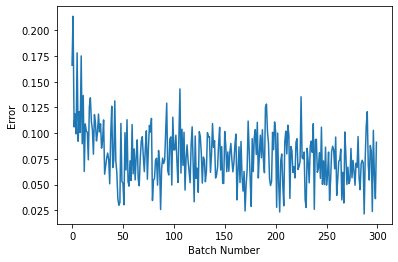

In [ ]:
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()

In [ ]:
print(W.numpy()) # a weight matrix of shape (50,784)

[[-0.32999995 -0.58999974 -0.3799999  ... -0.25000003 -0.45999983
  -0.32999995]
 [-0.29999998 -0.65999967 -0.29999998 ... -0.19000001 -0.3899999
  -0.33999994]
 [-0.29999998 -0.58999974 -0.36999992 ... -0.23000003 -0.43999985
  -0.29999998]
 ...
 [-0.27       -0.5099998  -0.33999994 ... -0.17       -0.3999999
  -0.35999992]
 [-0.29       -0.58999974 -0.31999996 ... -0.21000002 -0.3999999
  -0.27      ]
 [-0.26000002 -0.5499998  -0.33999994 ... -0.19000001 -0.3999999
  -0.28      ]]


## Learned features

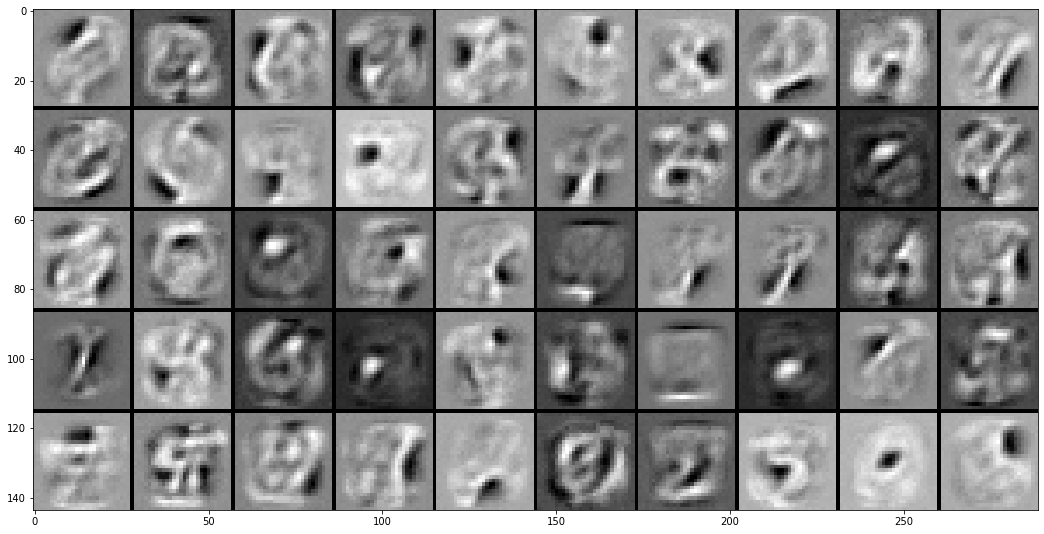

In [ ]:
tile_raster_images(X=W.numpy().T, img_shape=(28, 28), tile_shape=(5, 10), tile_spacing=(1, 1))
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(X=W.numpy().T, img_shape=(28, 28) ,tile_shape=(5, 10), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

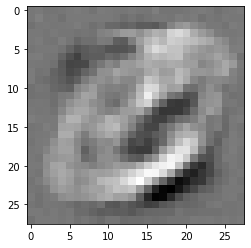

In [ ]:
from PIL import Image
image = Image.fromarray(tile_raster_images(X =W.numpy().T[10:11], img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (4.0, 4.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

--2020-12-15 13:33:28--  https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.box.com (ibm.box.com)... 107.152.26.197
Connecting to ibm.box.com (ibm.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg [following]
--2020-12-15 13:33:28--  https://ibm.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg [following]
--2020-12-15 13:33:28--  https://ibm.ent.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.ent.box.com (ibm.ent.box.com)... 107.152.26.201
Connecting to ibm.ent.box.com (ibm.ent.box.com)|107.152.26.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b

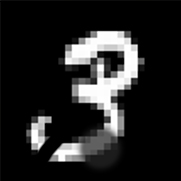

In [ ]:
!wget -O destructed3.jpg  https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
img = Image.open('destructed3.jpg')
img

In [ ]:
# convert the image to a 1d numpy array
sample_case = np.array(img.convert('I').resize((28,28))).ravel().reshape((1, -1))/255.0

sample_case = tf.cast(sample_case, dtype=tf.float32)

In [ ]:
hh0_p = tf.nn.sigmoid(tf.matmul(sample_case, W) + hb)
hh0_s = tf.round(hh0_p)

print("Probability nodes in hidden layer:" ,hh0_p)
print("activated nodes in hidden layer:" ,hh0_s)

# reconstruct
vv1_p = tf.nn.sigmoid(tf.matmul(hh0_s, tf.transpose(W)) + vb)

print(vv1_p)
#rec_prob = sess.run(vv1_p, feed_dict={ hh0_s: hh0_s_val, W: prv_w, vb: prv_vb})

Probability nodes in hidden layer: tf.Tensor(
[[3.65310626e-08 9.99997854e-01 2.61544119e-05 1.27660877e-08
  9.99999166e-01 1.28638862e-15 4.20448923e-05 3.70056077e-05
  9.99816298e-01 8.51487875e-01 7.60162830e-01 1.01738483e-14
  3.35256128e-11 9.69791055e-01 2.62590174e-06 2.15991469e-16
  1.38343990e-01 9.81593251e-01 1.05637312e-03 7.95232427e-06
  9.99997199e-01 7.84844160e-04 2.97374129e-02 1.14010508e-08
  1.28895044e-04 1.00000000e+00 2.64832600e-09 1.70921695e-08
  9.99574721e-01 8.64305794e-02 3.35090998e-16 9.99791026e-01
  1.21683093e-04 1.14809483e-01 4.03589315e-11 9.99619365e-01
  9.99999762e-01 9.99999702e-01 1.28165534e-10 1.00000000e+00
  5.58267421e-18 4.12613153e-04 1.04017526e-01 9.99994695e-01
  6.24529151e-10 4.74464105e-05 9.99918818e-01 9.82043505e-01
  1.28606546e-14 3.59387543e-17]], shape=(1, 50), dtype=float32)
activated nodes in hidden layer: tf.Tensor(
[[0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
  0. 1. 0. 0. 1. 0. 0. 1. 0

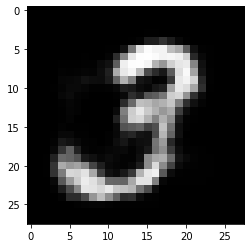

In [ ]:
img = Image.fromarray(tile_raster_images(X=vv1_p.numpy(), img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (4.0, 4.0)
imgplot = plt.imshow(img)
imgplot.set_cmap('gray') 